# Analyzing Reddit Content Growth

In this notebook we study different aspects of content growth and rates in Reddit. Our focus is to compare that of Switzerland associated subreddites with other european countries.

We have three sets of data: UK, EUROPE, SWITZERLAND. We will import and process them independently, EUROPE splitted in Germany, France, Italy, Spain. Finally we will proceed to make the analysis

In [1]:
# Import Libraries

%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_context('notebook')
from datetime import datetime
import os
import glob

In [2]:
# Load data

# Europe
path = "../data/reddit_europe_submissions_fullcorpus"
all_files = glob.glob(os.path.join(path, "part-*"))
df_eu = pd.concat((pd.read_csv(f) for f in all_files))

#UK
path = "../data/reddit_uk_submissions_fullcorpus"
all_files = glob.glob(os.path.join(path, "part-*"))
df_uk = pd.concat((pd.read_csv(f) for f in all_files))

#Switzerland
path = "../data/reddit_swiss_submissions_fullcorpus"
all_files = glob.glob(os.path.join(path, "part-*"))
df_ch = pd.concat((pd.read_csv(f) for f in all_files))

In [3]:
df_eu.columns

Index(['adserver_click_url', 'adserver_imp_pixel', 'archived', 'author',
       'author_flair_css_class', 'author_flair_text', 'created', 'created_utc',
       'disable_comments', 'distinguished', 'domain', 'downs', 'edited',
       'from', 'from_id', 'from_kind', 'gilded', 'hide_score', 'href_url',
       'id', 'imp_pixel', 'is_self', 'link_flair_css_class', 'link_flair_text',
       'media', 'media_embed', 'mobile_ad_url', 'name', 'num_comments',
       'over_18', 'permalink', 'post_hint', 'preview', 'promoted',
       'quarantine', 'retrieved_on', 'saved', 'score', 'secure_media',
       'secure_media_embed', 'selftext', 'stickied', 'subreddit',
       'subreddit_id', 'third_party_tracking', 'third_party_tracking_2',
       'thumbnail', 'title', 'ups', 'url'],
      dtype='object')

In [4]:
## Separate Europe

# Declare lists of subreddits for different countries
de_subreddits = ['germany', 'de', 'German', 'GermanPractice', 'GermanFacts', 'GermanConversation', 'SCHLAND',
                 'germanyusa', 'DEjobs', 'bundesliga', 'GermanyPics', 'germusic', 'de_punk', 'germanrap', 'NDH']

fr_subreddits = ['blagues', 'cinemacinema', 'france', 'FrancePics', 'frenchelectro', 'Frenchhistory',
                 'guessthefrenchmovie', 'Ligue1', 'Livres', 'musiquefrancaise', 'paris', 'pedale', 'philosophie',
                 'Politique', 'rance', 'ScienceFr', 'SocialFrance']

it_subreddits = ['Calcio', 'ITAGLIA', 'Italianhistory', 'ITALIANMUSIC', 'italy', 'ItalyPhotos', 'Libri', 'Abruzzo',
                 'Apulia', 'bari', 'Basilicata', 'bologna', 'Calabria', 'Campania', 'Catania', 'emilia_romagna',
                 'firenze', 'friuli', 'Genova', 'Italia', 'lazio', 'Liguria', 'lombardia', 'Lombardy', 'marche',
                 'messina', 'milano', 'Modena', 'molise', 'Naples_Italy', 'napoli', 'padova', 'Palermo', 'Perugia',
                 'Piedmont', 'piemonte', 'Pisa', 'puglia', 'roma', 'rome', 'romesocialclub', 'Sardegna', 'Sardinia',
                 'Sicilia', 'sicily', 'Siracusa', 'torino', 'Toscana', 'trentino_alto_adige', 'trentod', 'Trieste',
                 'tuscany', 'Umbria', 'valle_daosta', 'Veneto', 'Venezia']

es_subreddits = ['Barcelona', 'EPANA', 'es', 'futbol', 'Granada', 'LaLiga', 'Madrid', 'spain', 'Andalucia', 'SpanishHistory']

# Filter
df_eu = df_eu.set_index('subreddit')
df_de = df_eu.ix[de_subreddits,:].reset_index()
df_fr = df_eu.ix[fr_subreddits,:].reset_index()
df_it = df_eu.ix[it_subreddits,:].reset_index()
df_es = df_eu.ix[es_subreddits,:].reset_index()

In [5]:
## Add COUNTRY field and merge data

df_ch['Country'] = 'CH'
df_uk['Country'] = 'UK'
df_de['Country'] = 'DE'
df_fr['Country'] = 'FR'
df_it['Country'] = 'IT'
df_es['Country'] = 'ES'

df = pd.concat([df_ch,df_uk,df_de,df_fr,df_it,df_es])

In [6]:
df.shape

(801615, 51)

We will be analyzing a total of **801615** threads across all the countries mentioned

## 1. On Data Volume by country

To start making sense of the data we have, we wonder how much belongs to each country

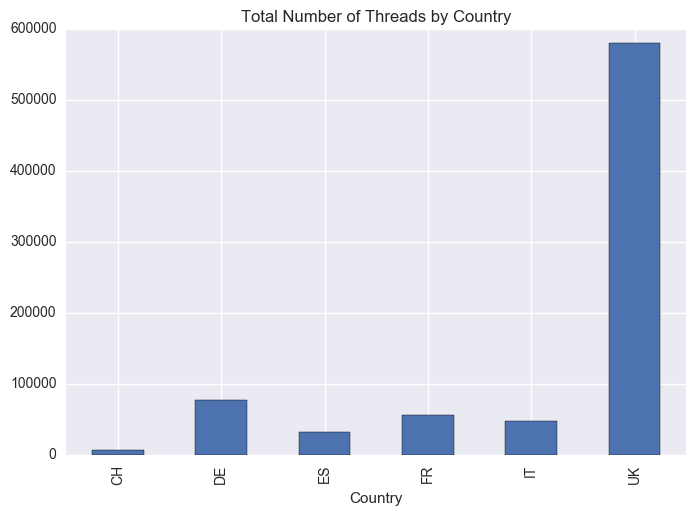

In [12]:
df_count_by_country = df.groupby('Country').count()
df_count_by_country.created.plot(kind='bar', title='Total Number of Threads by Country')

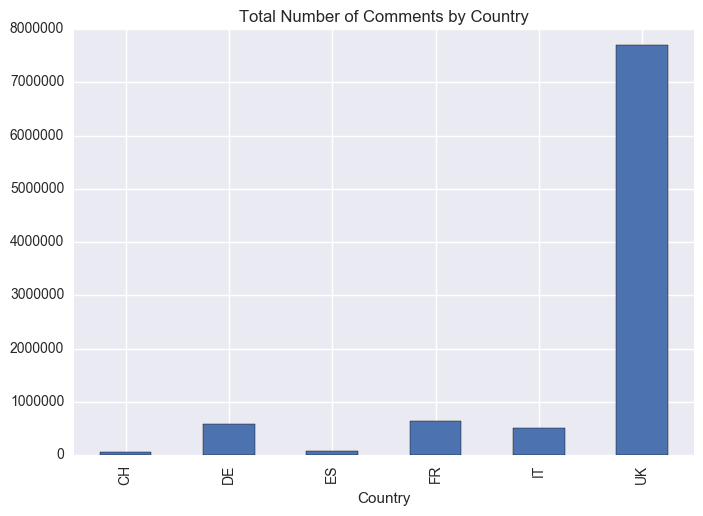

In [13]:
df_comments_by_country = df.groupby('Country')['num_comments'].sum()
df_comments_by_country.plot(kind='bar', title='Total Number of Comments by Country')

We observe how UK widely dominates both graphs, number of threads and number of comments. Switzerland, being the smallest of these countries, is justifiably behind.

## 2. On time evolution of Reddit activity

We are interested to see how growth of user's activity in Reddit has evolved through the years